In [ ]:
자전거 코드는 이것 사용할것

In [ ]:
https://romg2.github.io/mlguide/10_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C-05.-%ED%9A%8C%EA%B7%80-%EC%8B%A4%EC%8A%B5/

In [ ]:
https://dsbook.tistory.com/328

In [ ]:
https://github.com/wikibook/pymlrev2/blob/main/5%EC%9E%A5/5.9%20Regression%EC%8B%A4%EC%8A%B5-Bike%20Sharing%20Demand.ipynb

In [ ]:
1. 자전거 대여 수요 예측

In [ ]:
# 자전거 데이터 캐글
https://www.kaggle.com/c/bike-sharing-demand/overview

In [ ]:
자전거 대여 수요 예측: https://www.kaggle.com/competitions/bike-sharing-demand/data
주택 가격: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [ ]:
1.1 데이터 불러오기

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
bike_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bike_train.csv')
bike_df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [69]:
bike_df.tail(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [70]:
print(bike_df.shape)

(10886, 12)


In [71]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
# 데이터는 10,886 x 12개로 이루어져 있으며 피처 변수는 datetime이 object, 나머지는 float, int형으로 이루어져 있다.
# datetime의 자료 유형 변경이 필요하다(처음 불러올 떄 반영해도 된다).
# casual + registered = count이므로 casual과 registered는 피처로 사용하지 않고 제외 한다.

In [34]:
# # datetime 날짜형으로 변경
# bike_df["datetime"] = bike_df["datetime"].apply(pd.to_datetime)

# # datetime 나누기
# bike_df["year"] = bike_df["datetime"].dt.year
# bike_df["month"] = bike_df["datetime"].dt.month
# bike_df["day"] = bike_df["datetime"].dt.day
# bike_df["hour"] = bike_df["datetime"].dt.hour
##요일추출
#bike_df['dayofweek']=bike_df['datetime'].dt.dayofweek #요일 추출 , 월요일:0, 일요일:6#

# # 필요없는 피처 삭제하기
# # datetime, casual, registered 제거
# col_order = bike_df.columns[-4:].to_list() + bike_df.columns[1:-7].to_list() + ["count"]
# bike_df = bike_df[col_order]

# bike_df.head(3)

,year,month,day,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011,1,1,0,1,0,0,1,9.84,14.395,81,0.0,16
1,2011,1,1,1,1,0,0,1,9.02,13.635,80,0.0,40
2,2011,1,1,2,1,0,0,1,9.02,13.635,80,0.0,32


In [ ]:
# pd.to_datetime의 함수를 통해서 datetime 데이터 형으로 전화되고,
# 이 데이터 타입을 이요해서 쉽게 년, 월, 일, 시의 정보를 추출할 수 있다.

In [35]:
bike_df.tail(3)

,year,month,day,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
10883,2012,12,19,21,4,0,1,1,13.94,15.910,61,15.0013,168
10884,2012,12,19,22,4,0,1,1,13.94,17.425,61,6.0032,129
10885,2012,12,19,23,4,0,1,1,13.12,16.665,66,8.9981,88


In [37]:
bike_df.describe()

,year,month,day,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011.501929,6.521495,9.992559,11.541613,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132
std,0.500019,3.444373,5.476608,6.915838,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454
min,2011.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000
25%,2011.000000,4.000000,5.000000,6.000000,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000
50%,2012.000000,7.000000,10.000000,12.000000,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000
75%,2012.000000,10.000000,15.000000,18.000000,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000
max,2012.000000,12.000000,19.000000,23.000000,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000


In [ ]:
### 아래 3개는 파이썬 머신러닝 가이드 개정 2판 깃헙 코드에서 다른 거에서 참고

In [157]:
# 문자열을 datetime 타입으로 변경.
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

# datetime 타입에서 년, 월, 일, 시간 추출
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)
#요일추출
#bike_df['dayofweek']=bike_df.datetime.apply(lambda x: x.dayofweek) #요일 추출 , 월요일:0, 일요일:6
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [158]:
drop_columns = ['datetime','casual','registered']
bike_df.drop(drop_columns, axis=1,inplace=True)

In [ ]:
# 막대 그래프
조건에 따른 대여량 시각화
(일반적으로 범주형테이터인 연, 월, 시즌, 날씨, 일, 시간, 휴일, 근무일)

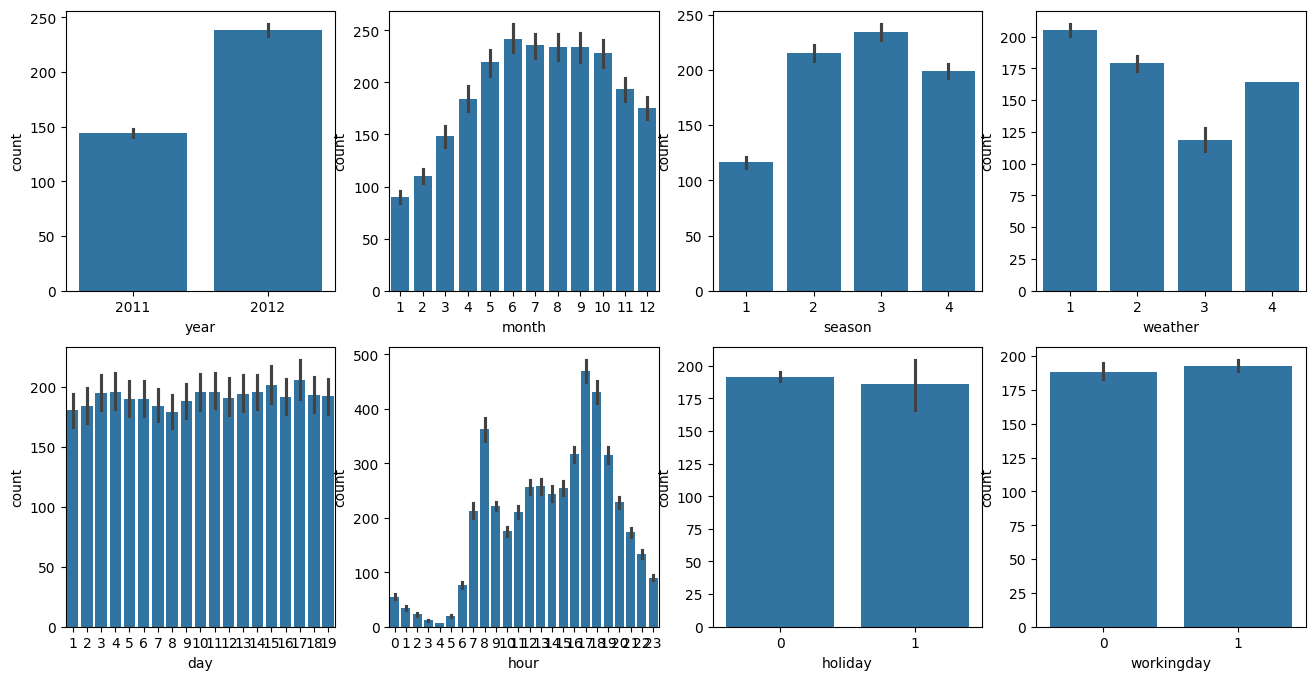

In [74]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
cat_features = ['year', 'month','season','weather','day', 'hour', 'holiday','workingday']
# cat_features에 있는 모든 칼럼별로 개별 칼럼값에 따른 count의 합을 barplot으로 시각화
for i, feature in enumerate(cat_features):
    row = int(i/4)
    col = i%4
    # 시본의 barplot을 이용해 칼럼값에 따른 count의 합을 표현
    sns.barplot(x=feature, y='count', data=bike_df, ax=axs[row][col])

In [ ]:
### 위의 3개는 다른 거에서 참고

In [ ]:
# 박스플롯
수치형 데이터의 정보를 나타내는 그래프
계절, 날씨, 공휴일, 근무일별 대여 수량을 박스 플롯으로 그려서
각 범주형 데이터에 따라 타깃값인 대여 수량이 어떻게 변하는지 알 수 있다.

In [ ]:
https://diane-space.tistory.com/67

<Axes: xlabel='hour', ylabel='count'>

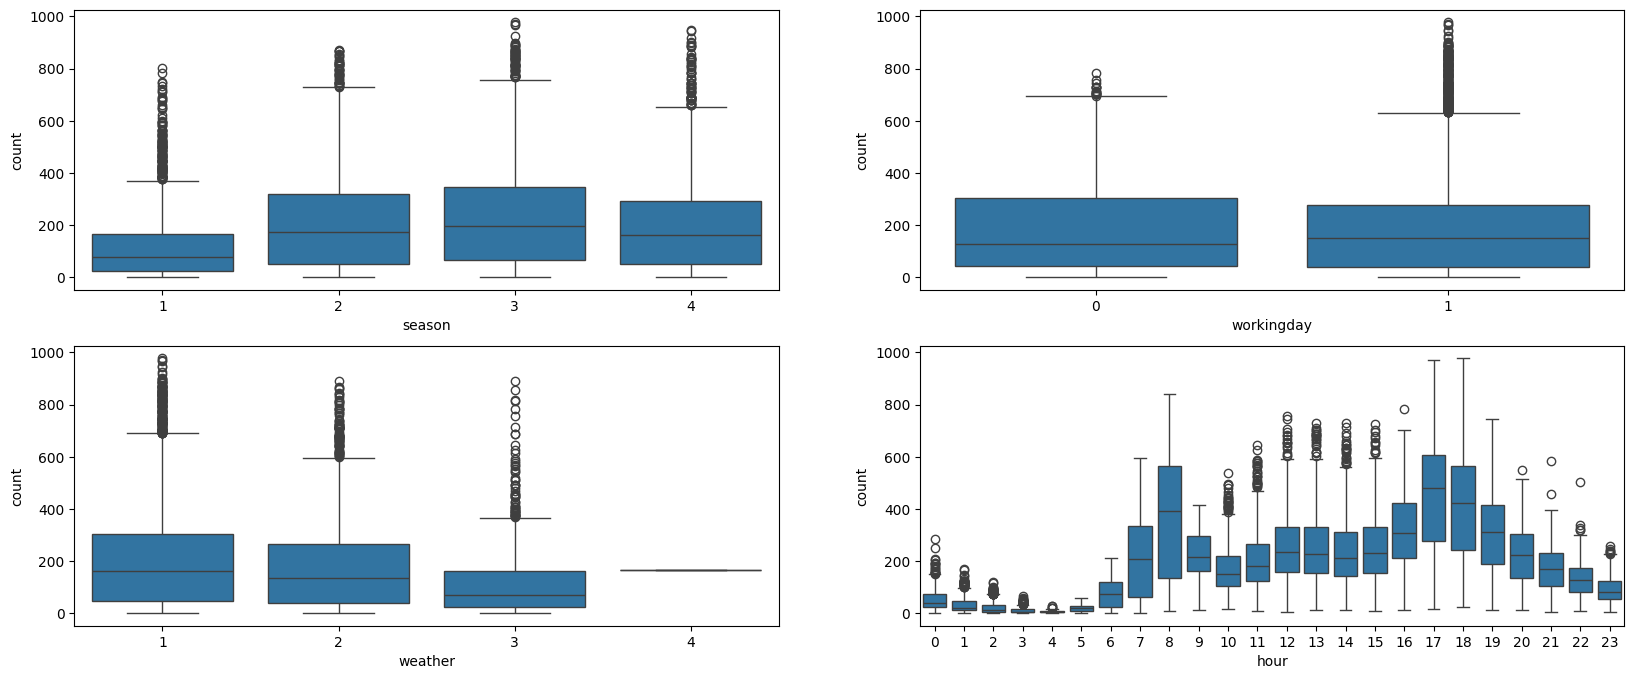

In [98]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(20,8)

sns.boxplot(data=bike_df, x="season", y="count", ax=axes[0][0])
sns.boxplot(data=bike_df, x="workingday", y="count", ax=axes[0][1])
sns.boxplot(data=bike_df, x = 'weather', orient="v", y="count", ax=axes[1][0])
#상자 그림 작성 (세로방향) orient“v” | “h”, optional
sns.boxplot(data=bike_df, x="hour", y="count", ax=axes[1][1])

In [ ]:
겨울 보다 여름 가을에 수요량이 더 많은 것을 확인할 수 있다.

겨울에는 극단치 데이터가 많은 편이다.

근무시간이 아닐 때 보다 근무시간에 극단치 데이터가 많은 편이다.

출퇴근 시간에 자전거 수요량이 높음을 확인할 수 있다.

In [ ]:
# 포인트 플롯
막대 그래프와 동일한 정보이지만 한 화면에 여러 그래프를 그려 서로 비교하기에 적합

<Axes: xlabel='hour', ylabel='count'>

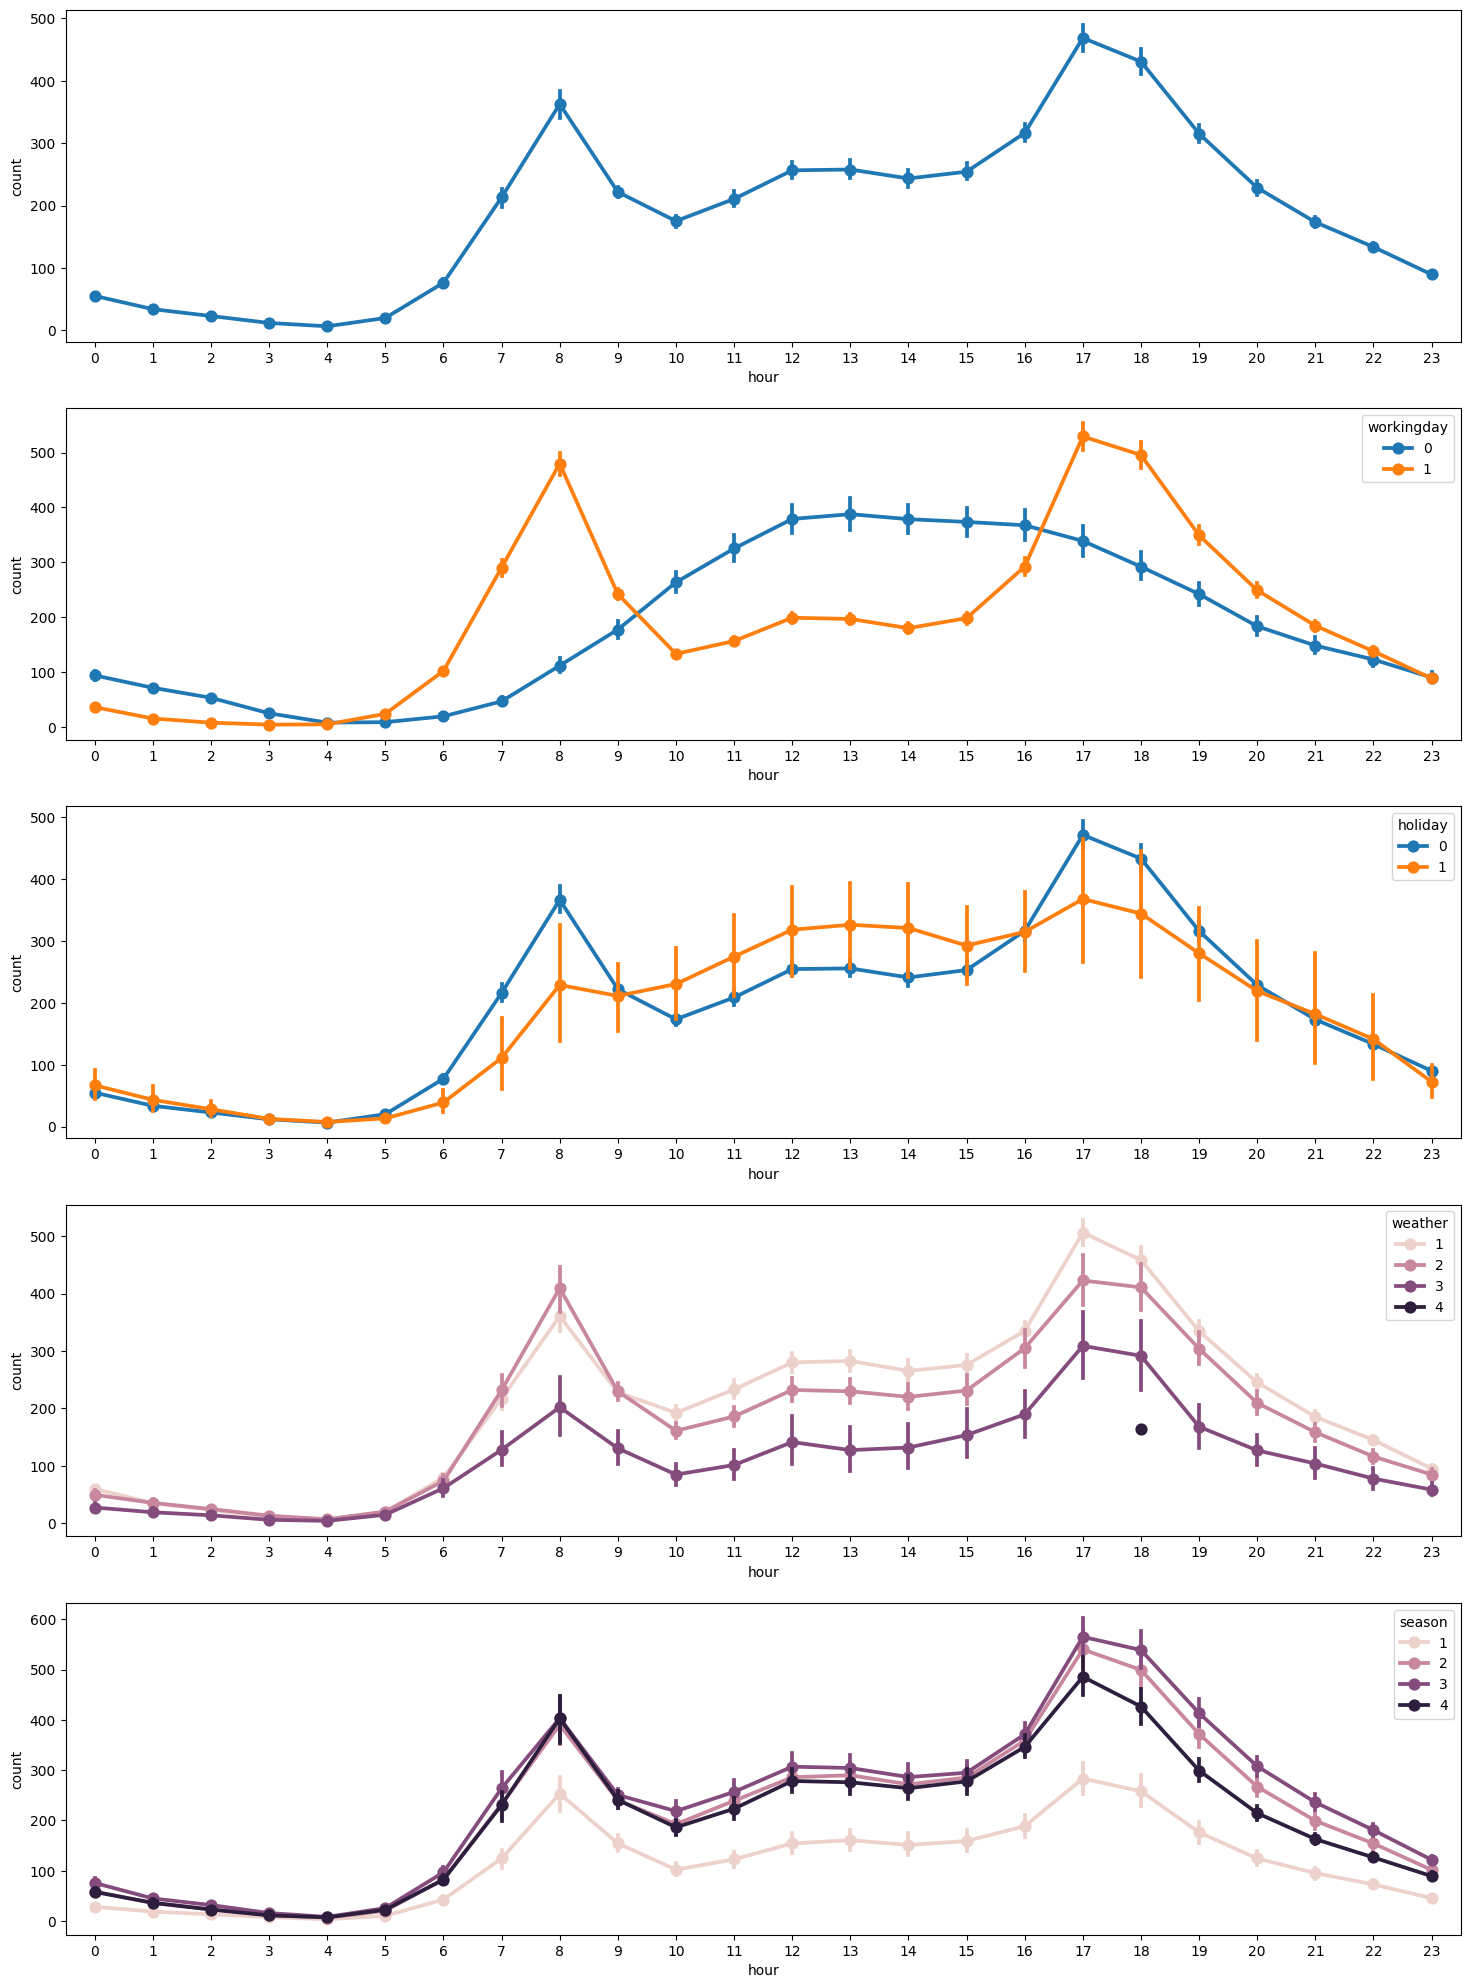

In [92]:
fig, (ax1, ax2, ax3, ax4, ax5)=plt.subplots(nrows=5)
#figure, axes = plt.subplots(nrows=5) # 5행 1열로 나타내도 됨, ax = axes[0]
fig.set_size_inches(18,25)

sns.pointplot(data=bike_df, x="hour", y="count", ax=ax1)
# x, y, hue names of variables in data or vector data, optional
sns.pointplot(data=bike_df, x="hour", y="count",hue='workingday' ,ax=ax2)
sns.pointplot(data=bike_df, x="hour", y="count",hue='holiday' ,ax=ax3)
sns.pointplot(data=bike_df, x="hour", y="count",hue='weather' ,ax=ax4)
sns.pointplot(data=bike_df, x="hour", y="count",hue='season' ,ax=ax5)

In [ ]:
어느정도 예측 가능한 그래프가 나왔습니다.
출퇴근 시간이라고 예상되는 8시, 17시, 18시가 가장 대여량이 많습니다.
폭우와 폭설이 내리는 날씨(heavy)는 대여량이 거의 없는 것을 볼 수 있습니다.

In [ ]:
봄보다 겨울 대여량이 많은 것이 신기해 계절을 어떻게 나눴는지 확인해 봅니다.
1, 2, 3월 봄
4, 5, 6월 여름
7, 8, 9월 가을
10, 11, 12월 겨울

In [99]:
pd.crosstab(bike_df['season'], bike_df['month'])

month,1,2,3,4,5,6,7,8,9,10,11,12
season,,,,,,,,,,,,
1,884,901,901,0,0,0,0,0,0,0,0,0
2,0,0,0,909,912,912,0,0,0,0,0,0
3,0,0,0,0,0,0,912,912,909,0,0,0
4,0,0,0,0,0,0,0,0,0,911,911,912


In [ ]:
데이터를 다시 살펴보니 워싱턴DC 지역이라고 나와있어서 원별 온도를 찾아봤습니다.

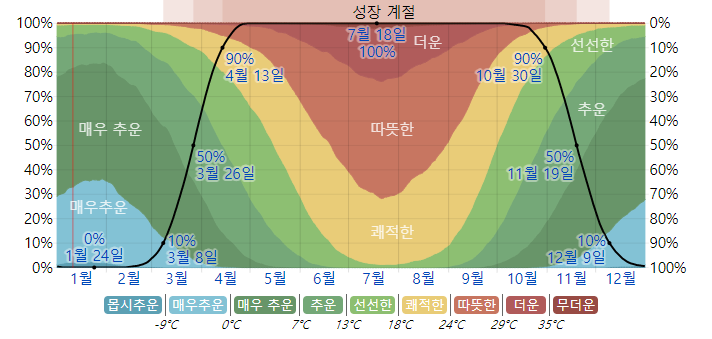

In [ ]:
출처 : https://ko.weatherspark.com/y/20957/%EB%AF%B8%EA%B5%AD-%EC%BB%AC%EB%9F%BC%EB%B9%84%EC%95%84-%ED%8A%B9%EB%B3%84%EA%B5%AC-%EC%9B%8C%EC%8B%B1%ED%84%B4-D.C.%EC%9D%98-%EB%85%84%EC%A4%91-%ED%8F%89%EA%B7%A0-%EB%82%A0%EC%94%A8

In [ ]:
그래프를 보니 1, 2, 3월을 나타내는 봄이 왜 대여량이 낮은지 알 것 같습니다.

In [ ]:
# 회귀선을 포함한 산점도 그래프(regplot)
수치형 데이터 간 상관관계를 파악하는데 사용하는 그래프
수치형 데이터인 온도, 체감온도, 풍속, 습도별 대여 수량을 그래프로 그려 상관관계를 파악

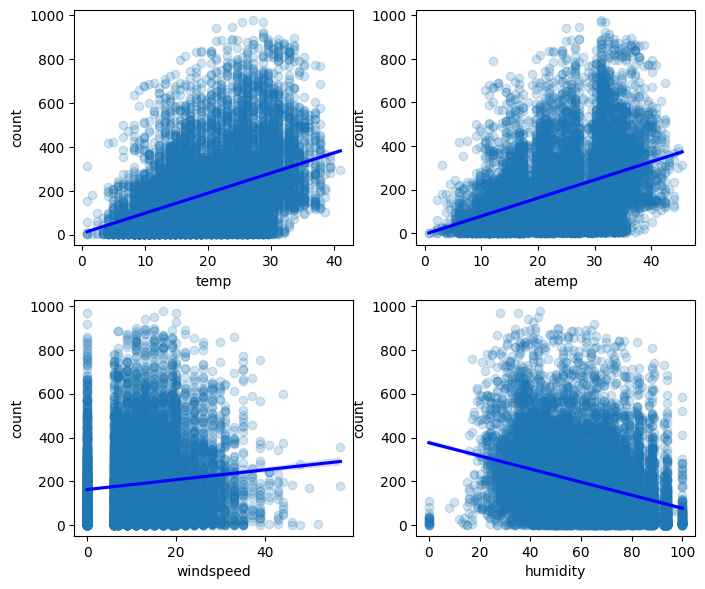

In [101]:
# 스텝 1 : m행 n열 Figure 준비
figure, axes = plt.subplots(nrows=2, ncols=2) # 2행 2열
plt.tight_layout()
figure.set_size_inches(7, 6)

# 온도, 체감 온도, 풍속, 습도 별 대여 수량 산점도 그래프
sns.regplot(x='temp', y='count', data=bike_df, ax=axes[0, 0],
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='atemp', y='count', data=bike_df, ax=axes[0, 1],
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='windspeed', y='count', data=bike_df, ax=axes[1, 0],
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='humidity', y='count', data=bike_df, ax=axes[1, 1],
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'});


In [ ]:
scatter_kws={'alpha': 0.2} 는 찍히는 점의 투명도를 조절하고, line_kws={'color': 'blue'} 는 회귀선의 색상을 선택하는 파라미터이다.

회귀선의 기울기로 대략적인 추세를 파악할 수 있다.

3번째 그래프에서는 0인 데이터가 많은데, 이는 결측치가 많아서 그런것으로 상관과계를 파악하기 힘드므로 windspeed feature를 제거하도록 한다.

In [ ]:
# 히트맵
temp, atemp, humidity, windspeed, count는 수치형 데이터이고,
이들끼리의 상관관계를 알아보기 위해 corr() 함수로 feature간 상관계수를 알아본다.

In [102]:
bike_df[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


In [ ]:
이를 한눈에 보기 편하게 heatmap()함수로 히트맵을 그려준다.
corr()함수로 구한 상관관계 매트릭스 corrMat을 hetmap()함쉐 인수로 넣어준다.
annot = True 로 하면 상관계수가 숫자로 표시된다.

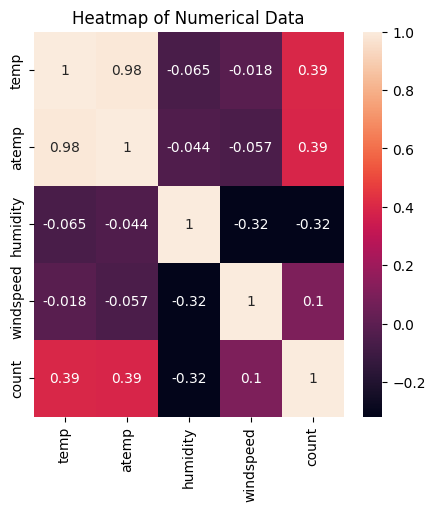

In [104]:
# 피처 간 상관관계 매트릭스
corrMat = bike_df[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()
fig, ax= plt.subplots()
fig.set_size_inches(5, 5)
sns.heatmap(corrMat, annot=True) # 상관관계 히트맵 그리기
ax.set(title='Heatmap of Numerical Data');

In [ ]:
타깃값이 count와의 상관관계가 중요한데, 다른 feature에 비해 windspeed feature는 상관계수가 0.1로 매우 낮기에 도움이 안되므로 제거하도록한다.

In [ ]:
# 연도별 월별 자전거 대여량 구하기

In [95]:
#2011년과 2012년 따로 구분하여 재출력 하고자함
def ym(mydt):
    return"{0}-{1}".format(mydt.year,mydt.month)

bike_df['year_month']=bike_df['datetime'].apply(ym)
bike_df[['datetime','year_month']]

KeyError: 'datetime'

<Axes: xlabel='month', ylabel='count'>

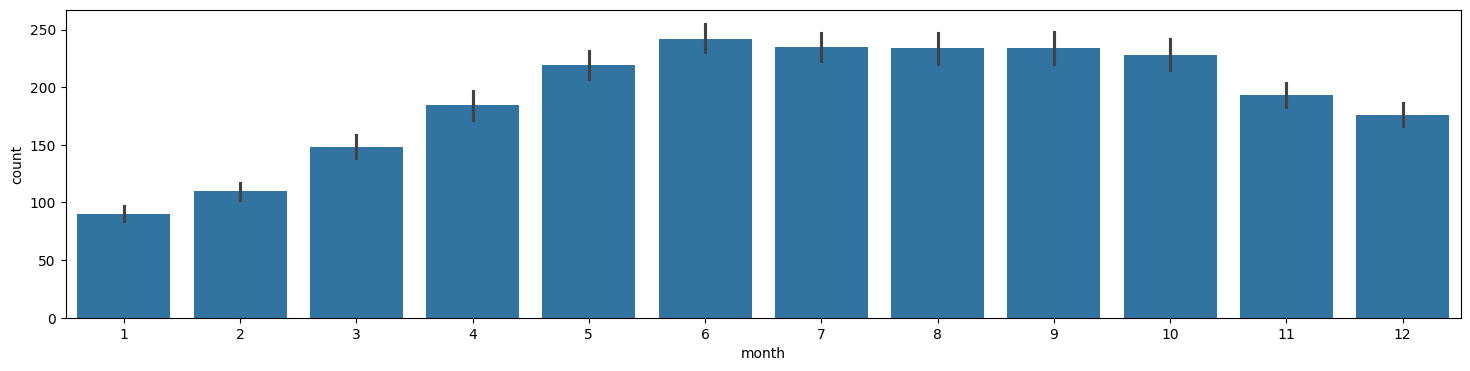

In [96]:
fig,axes=plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18,4)

sns.barplot(data=bike_df, x="month", y="count",ax=axes)
# 2012년에 자전거 대여량증가, 겨울보다 여름에 증가

In [ ]:
# 평가지표
# 캐글에서 요구한 성능평가 방법은 RMSLE(Root Mean Squared Log Error)

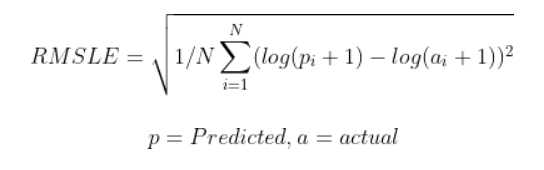

In [ ]:
여기서 로그안에 +1을 해주는 이유는 p나 a의 값이 0일때 음의 무한대여서 언더플로우가 발생하는 것을 방지하기 위해

In [ ]:
# RMSLE의 장점
아웃라이어가 있더라도 크게 영향받지 않는다.
상대적 Error를 측정
Under Estimation에 큰 패널티를 부여
사이킷런에서는 RMSLE를 제공하지 않으므로 함수를 직접 만들어야 함

In [ ]:
# 1.2 성능 평가 함수

In [38]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error

# # MAE, RMSE, RMSLE 반환
# def evaluate_regr(y,pred):
#     # MAE
#     mae = mean_absolute_error(y,pred)

#     # RMSE
#     rmse = np.sqrt(mean_squared_error(y,pred))

#     # RMSLE
#     log_y = np.log1p(y)
#     log_pred = np.log1p(pred)
#     msle = np.mean((log_y - log_pred) ** 2)
#     rmsle = np.sqrt(msle)

#     print(f'MAE: {mae:.3f}, RMSE: {rmse:.3f}, RMSLE: {rmsle:.3f}')

In [159]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log 값 변환 시 NaN등의 이슈로 log() 가 아닌 log1p() 를 이용하여 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error() 를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# MSE, RMSE, RMSLE 를 모두 계산
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    # MAE 는 scikit learn의 mean_absolute_error() 로 계산
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))

In [ ]:
# MAE, RMSE, RMSLE를 반환하는 함수를 정의하였다.
# RMSLE를 mean_squared_log_error나 np.log로 계산할 수 있는데 이 경우 데이터 값의 크기에 따라 오버플로/언더플로 오류가 발생할 수 있다.
# np.log1p는 log(1+입력값)으로 np.expm1을 이용하면 exp(입력값-1)로서 원래의 값으로 복원 가능하다.

In [ ]:
1.3 선형회귀

In [ ]:
회귀 모델을 적용하기 전에 데이터 세트에 대해 먼저 처리해야 할 사항2가지
- 결과값(타깃 데이터)이 정규 분포로 되어 있는가?
- 카테고리형 데이터 셋을 One-Hot Encoding을 수행했는가?

먼저 Linear Regression 모델을 통해서 회귀 예측을 하면

In [ ]:
로그 변환, 피처 인코딩, 모델 학습/예측/평가

In [39]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression

# X_features = bike_df.drop(['count'],axis=1,inplace=False)
# y_target = bike_df['count']

# X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

# # LinearRegression
# lr_reg = LinearRegression()
# lr_reg.fit(X_train, y_train)
# pred = lr_reg.predict(X_test)

# evaluate_regr(y_test ,pred)

MAE: 105.924, RMSE: 140.900, RMSLE: 1.165


<ipython-input-38-63d02db4a5fe>:13: RuntimeWarning: invalid value encountered in log1p
  log_pred = np.log1p(pred)


In [160]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , Lasso

y_target = bike_df['count']
X_features = bike_df.drop(['count'],axis=1,inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test ,pred) # 테스트 실제값, 테스트 예측값

RMSLE: 1.165, RMSE: 140.900, MAE: 105.924


<ipython-input-159-4a92ff1543cb>:6: RuntimeWarning: invalid value encountered in log1p
  log_pred = np.log1p(pred)


In [ ]:
이 평가 지표는 예측 오류로서는 큰 값이므로 현재 데이터가 제대로 전처리되지 않은 부분이 존재한다는 것을 시사한다.

In [ ]:
여기서 RMSE, MAE 값의 의미 다시 확인할것!!!

In [40]:
# def get_top_error_data(y_test, pred, n_tops = 5):
#     # 예측값, 실제값 데이터 프레임
#     result_df = pd.DataFrame(y_test.values, columns=['real_count'])
#     result_df['predicted_count']= np.round(pred)
#     result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])

#     # 예측값과 실제값의 차이가 큰 순서로 출력
#     print(result_df.sort_values('diff', ascending=False)[:n_tops])

# get_top_error_data(y_test,pred,n_tops=10)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0
2277         813            267.0  546.0
2314         766            222.0  544.0
454          721            177.0  544.0
1003         713            171.0  542.0
2394         684            142.0  542.0


In [161]:
def get_top_error_data(y_test, pred, n_tops = 5):
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측 값을 서로 비교 할 수 있도록 생성.
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count']= np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력.
    print(result_df.sort_values('diff', ascending=False)[:n_tops])

# 만들어진 모델을 가지고 실제 대여횟수와 예측값을 비교
get_top_error_data(y_test,pred,n_tops=10)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0
2277         813            267.0  546.0
2314         766            222.0  544.0
454          721            177.0  544.0
1003         713            171.0  542.0
2394         684            142.0  542.0


In [ ]:
실제 자전거 대여 횟수와 예측 자전거 대여 횟수가 500회 이상 차이가 나는 것을 통해서
예측 오류가 크다는 것을 확인할 수 있다.
이렇게 예측 오류가 발생한다면 가장 먼저 살펴볼 것은 타깃값의 분포가 정규분포를 따르고 있는지 확인하는 것이다.
종속 변수가 정규분포 형태를 따르지 않으면 회귀 예측 성능이 저하될 가능성이 높다.

In [162]:
# 실제값과 예측값의 평균을 비교하는 함수
def compare_means(y_test, pred):
    """
    실제값과 예측값의 평균을 비교하는 함수

    Parameters:
    y_test (pd.Series): 실제 대여 횟수
    pred (np.ndarray): 예측값

    Returns:
    None
    """
    actual_mean = y_test.mean()
    predicted_mean = pred.mean()

    print(f"실제값의 평균: {actual_mean:.4f}")
    print(f"예측값의 평균: {predicted_mean:.4f}")

compare_means(y_test, pred)

실제값의 평균: 194.4305
예측값의 평균: 193.4274


In [125]:
def get_low_error_data(y_test, pred, n_tops = 5):
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측 값을 서로 비교 할 수 있도록 생성.
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count']= np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력.
    print(result_df.sort_values('diff', ascending=True)[:n_tops])

# 만들어진 모델을 가지고 실제 대여횟수와 예측값을 비교
get_low_error_data(y_test,pred,n_tops=10)

      real_count  predicted_count  diff
1134          91             91.0   0.0
1009         110            110.0   0.0
2904           3              3.0   0.0
308           88             88.0   0.0
2832           7              7.0   0.0
2692          18             18.0   0.0
2570          82             82.0   0.0
2459         170            171.0   1.0
2430          13             12.0   1.0
1120          64             65.0   1.0


In [163]:
def get_compare_data(y_test, pred, data_num = 5):
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측 값을 서로 비교 할 수 있도록 생성.
    if(type(y_test) == pd.core.series.Series):
      result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    else:
      result_df = pd.DataFrame(y_test, columns=['real_count'])
    result_df['predicted_count']= np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력.
    print(result_df[:data_num])

# 만들어진 모델을 가지고 실제 대여횟수와 예측값을 비교
get_compare_data(y_test,pred,data_num=10)

   real_count  predicted_count   diff
0         244            321.0   77.0
1         239            251.0   12.0
2         229            242.0   13.0
3         467            389.0   78.0
4         335            291.0   44.0
5          40            259.0  219.0
6         329            299.0   30.0
7           2             62.0   60.0
8         141            260.0  119.0
9         391            166.0  225.0


In [ ]:
# 타깃 데이터의 분포 확인

<Axes: >

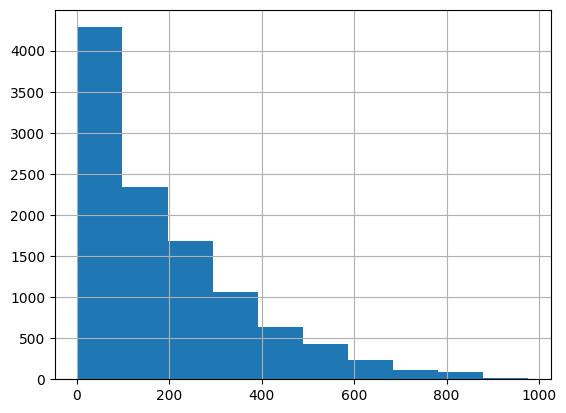

In [78]:
y_target.hist()

In [ ]:
0~200 사이에 타깃 데이터가 몰려 있는 것을 확인할 수 있다.
이렇게 한쪽으로 쏠려있는 분포를 나타내고 있는 경우에는 로그 변환을 통해서 정규 분포와 비슷한 형태로 변환할 수 있다.

<Axes: >

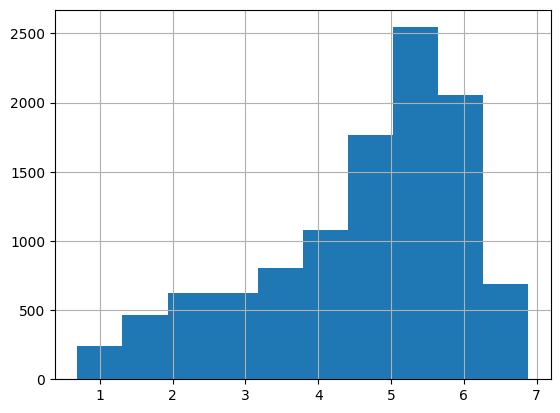

In [79]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

In [ ]:
* np.log1p()함수를 사용한 것은 0인 데이터의 경우 언더플로우 문제가 발생할 수 있기 때문

In [ ]:
# 이렇게 타깃 데이터를 변환한 후에 다시 평가 수행

In [43]:
# # target 로그 변환
# y_target_log = np.log1p(y_target)
# X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)

# # 로그 변환 후 학습/예측
# lr_reg = LinearRegression()
# lr_reg.fit(X_train, y_train)
# pred = lr_reg.predict(X_test)

# # 예측값, 실제값 원래 스케일로 변환
# y_test_exp = np.expm1(y_test)
# pred_exp = np.expm1(pred)

# evaluate_regr(y_test_exp ,pred_exp)

MAE: 109.286, RMSE: 162.594, RMSLE: 1.017


In [126]:
# 타깃 칼럼인 count 값을 log1p로 로그 변환
# 이렇게 타깃 데이터를 변환한 후에 다시 평가 수행
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
y_test_exp = np.expm1(y_test)

# 예측 값 역시 Log 변환된 타깃 기반으로 학습되어 예측되었으므로 다시 exmpl으로 scale변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp ,pred_exp)

RMSLE: 1.017, RMSE: 162.594, MAE: 109.286


In [ ]:
타깃 데이터와 예측값 모두 로그 변환이 되어 있는 상태이므로
예측까지 진행한 후에 평가 지표를 계산하기 위해서는 다시 np.expm1()함수를 통해서 실제값으로 변화해주어야 한다.

*** 적절한 조치를 취해 주었지만 성능 지표가 좋아지지 않거나
오히려 더 낮은 성능을 보이는 경우가 있다.
이런 경우에는 해당 전처리 과정이 잘못 되었을 수도 있지만, 다른 전처리 과정이 추가적으로 필요한 경우도 있다.

In [ ]:
### 이건 다른방식 시작 ###

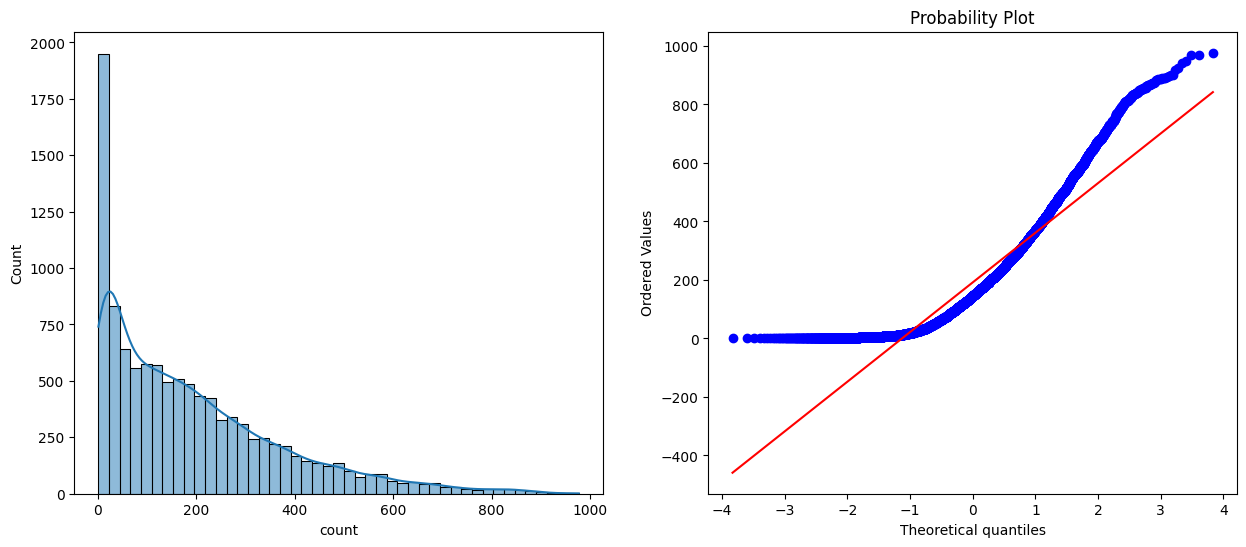

In [81]:
from scipy import stats

fig, axs = plt.subplots(1,2, figsize = (15,6))

sns.histplot(bike_df["count"], ax =axs[0], kde=True)
stats.probplot(bike_df["count"], dist='norm', fit=True, plot=axs[1])

plt.show()

In [ ]:
종속 변수의 분포는 왼쪽으로 치우쳐 있다.
Q-Q plot으로 정규분포가 아님을 한번 더 알 수 있다.
종속 변수를 정규분포 형태로 바꾸는 방법으로 로그 변환을 적용 해보자.

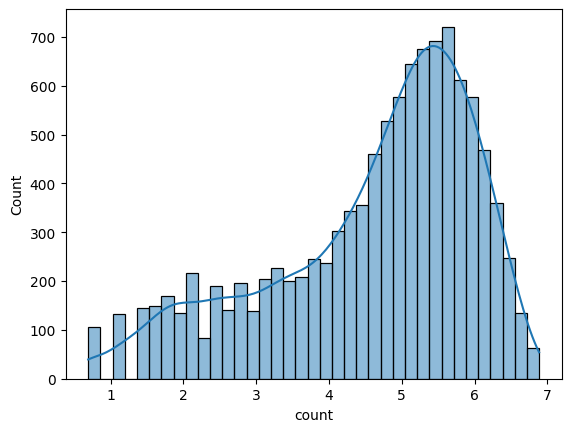

In [82]:
# 로그변환

sns.histplot(np.log1p(bike_df["count"]), kde=True)
plt.show()

In [ ]:
로그 변환 후 분포 역시 정규분포를 따른다고 보기 힘들지만 변환 전보다는 왜곡 정도가 완화되어 이대로 학습을 진행한다.

In [16]:
# target 로그 변환
y_target_log = np.log1p(y_target)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)

# 로그 변환 후 학습/예측
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train) # 모델훈련
pred = lr_reg.predict(X_test) # X_train으로 모델 예측해야하나? Noe

# 예측값, 실제값 원래 스케일로 변환
y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp ,pred_exp)

MAE: 109.286, RMSE: 162.594, RMSLE: 1.017


In [ ]:
훈련: 독립변수(feature)와 종속변수(타깃값)이 주어졌을 때 최적의 가중치(회귀계수)를 찾는 과정

예측: 최적의 가중치를 아는 상태(훈련된 모델)에서 새로운 독립변수(데이터)가 주어졌을 때 타깃값을 추정하는 과정

In [ ]:
RMSLE는 줄었지만 MAE, RMSE는 증가하였다.
종속 변수를 로그 변환해서 RMSLE는 그냥 RMSE로 구하면 비슷한 값일 듯 한데 원래 스케일 기준으로 모든 성능 평가 지표를 구했다.
이번에는 카테고리 피처에 대해 인코딩 작업을 진행해보자.

In [ ]:
### 이건 다른방식 끝 ###

In [ ]:
테스트 데이터 예측하려면?

In [137]:
get_top_error_data(y_test_exp,pred_exp,n_tops=10)

      real_count  predicted_count   diff
2199       201.0            913.0  712.0
3151       798.0            114.0  684.0
2314       766.0             96.0  670.0
412        745.0             78.0  667.0
2003       770.0            106.0  664.0
1379       745.0             84.0  661.0
454        721.0             72.0  649.0
1003       713.0             69.0  644.0
3227       724.0             87.0  637.0
2394       684.0             53.0  631.0


In [128]:
get_low_error_data(y_test_exp,pred_exp,n_tops=25)

      real_count  predicted_count          diff
1308        12.0             12.0  0.000000e+00
2237        86.0             86.0  0.000000e+00
257         35.0             35.0  0.000000e+00
719          6.0              6.0  0.000000e+00
3170        12.0             12.0  0.000000e+00
221         12.0             12.0  0.000000e+00
500         45.0             45.0  0.000000e+00
2648        15.0             15.0  1.776357e-15
366         27.0             27.0  3.552714e-15
1427        23.0             23.0  3.552714e-15
234         23.0             23.0  3.552714e-15
359         25.0             25.0  3.552714e-15
1269        38.0             38.0  7.105427e-15
886         59.0             59.0  1.421085e-14
1195        87.0             87.0  2.842171e-14
2759       123.0            123.0  2.842171e-14
1939       277.0            277.0  5.684342e-14
2848       165.0            165.0  5.684342e-14
3150       130.0            130.0  5.684342e-14
333        185.0            185.0  8.526

In [ ]:
베이스라인 모델로 예측한 결과를 제출
예측값이 log(count)이기에 예측한 값에 지수변환을 해주어야 하고,
꼭 테스트 데이터로 예측한 결과를 이용한다.

In [ ]:
# #pred = lr_reg.predict(X_test) # 테스트 데이터로 예측
# submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bike_sampleSubmission.csv')
# submission['count'] = np.exp(pred)    # 지수변환
# submission.to_csv('submission.csv', index=False) # 파일로 저장

In [ ]:
to_csv() 함수로 DataFrame을 csv 파일로 저장해주고, index=False로 설정해 인덱스를 제외하고 저장한다.

In [ ]:
# One-Hot Encoding

In [ ]:
선형 회귀 모델이 학습의 과정을 거쳐서 각 피처에 대한 계수를 산출했을 때, 해당 계수가 크다면,
그만큼 결과에 큰 영향을 끼치는 피처라는 것을 의미한다.
따라서 각 피처의 회귀 계수 값을 시각화해보자

<Axes: ylabel='None'>

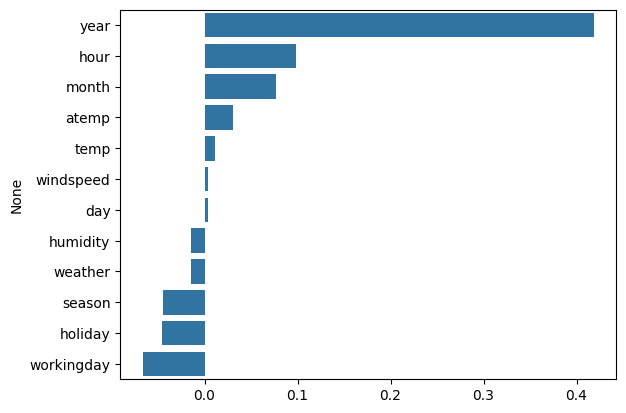

In [44]:
# coef = pd.Series(lr_reg.coef_, index=X_features.columns)
# coef_sort = coef.sort_values(ascending=False)
# sns.barplot(x=coef_sort.values, y=coef_sort.index)

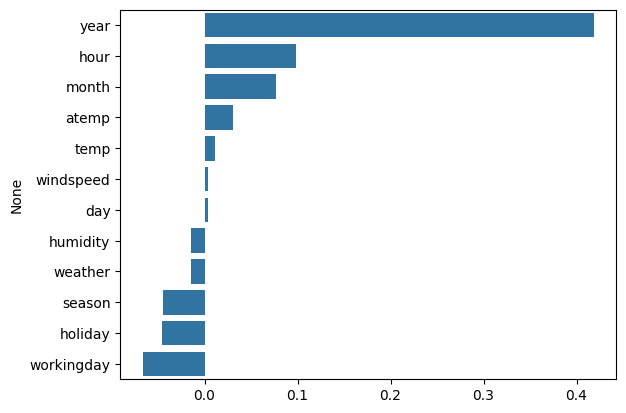

In [129]:
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)
plt.savefig('log_transform.tif', format='tif', dpi=300, bbox_inches='tight')

In [ ]:
Year 피처의 회귀 계수 값이 독보적으로 큰 계수 값을 가지고 있다.

In [ ]:
연도에 따라서 자전거 대여 횟수가 크게 영향을 받는다는 것은 상식적으로 논리에 맞지 않다.
이렇게 많은 영향을 받은 이유는 yser 피처는 연도를 뜻하므로 카테고리 형 피처지만 숫자형 값으로 되었있다.
이처럼 숫자형 카테고리 값을 선행회귀에 사용할 경우 회귀 계수를 연산할 때 이 숫자형 값에 크게 영향을 받는 경우가 발생할 수 있다.
이런 경우네는 원-핫 인코딩을 적용해 변환한다.

In [ ]:
각 피처의 의미를 이해해야 적절한 전처리 과정을 판단할 수 있다.

In [ ]:
1.3.3 피처인코딩

In [45]:
# # 카테고리 피처 원-핫 인코딩
# X_features_ohe = pd.get_dummies(X_features, columns=['year','month','hour', 'holiday','workingday','season','weather'])

# X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log, test_size=0.3, random_state=0)

In [ ]:
카테고리 피처에 대해 원-핫 인코딩 후 다시 train, test를 분리

In [164]:
# 'year', month', 'day', hour'등의 피처들을 One Hot Encoding
X_features_ohe = pd.get_dummies(X_features, columns=['year', 'month','day', 'hour', 'holiday',
                                              'workingday','season','weather'])

In [85]:
X_features_ohe.head()

,temp,atemp,humidity,windspeed,year_2011,year_2012,month_1,month_2,month_3,month_4,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,0.0,True,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False
1,9.02,13.635,80,0.0,True,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False
2,9.02,13.635,80,0.0,True,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False
3,9.84,14.395,75,0.0,True,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False
4,9.84,14.395,75,0.0,True,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False


In [ ]:
시험환경(판다스버전)에서는 여전히 0과 1입니다만 코랩(판다스버전)이 업데이트 되면서 True/False로 변경되었어요
원-핫 인코딩 결과로 나오는 False와 True는 여전히 0과 1과 동일한 의미를 가지므로, 모델 학습이나 데이터 처리에는 영향을 미치지 않습니다. 결과를 해석할 때는 False는 0, True는 1로 이해하시면 됩니다.

In [ ]:
# 모델별 성능 평가 함수

In [46]:
# from sklearn.linear_model import Ridge, Lasso

# def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
#     model.fit(X_train, y_train)
#     pred = model.predict(X_test)
#     if is_expm1:
#         y_test = np.expm1(y_test)
#         pred = np.expm1(pred)

#     print('###',model.__class__.__name__,'###')
#     evaluate_regr(y_test, pred)

In [47]:
# # LinearRegression, Ridge, Lasso
# lr_reg = LinearRegression()
# ridge_reg = Ridge(alpha=10)
# lasso_reg = Lasso(alpha=0.01)

# # 성능 평가
# models = [lr_reg, ridge_reg, lasso_reg]

# for model in models:
#     get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

### LinearRegression ###
MAE: 63.106, RMSE: 97.483, RMSLE: 0.589
### Ridge ###
MAE: 63.648, RMSE: 98.407, RMSLE: 0.589
### Lasso ###
MAE: 72.649, RMSE: 113.012, RMSLE: 0.634


In [ ]:
종속 변수의 로그 변환, 카테고리 피처 원-핫 인코딩 이후 선형 회귀 모델의 예측 성능이 많이 향상되었다.
현재까지 공부한 내용을 생각하면 추가적으로 연속형 피처의 스케일링이나 다중공선성 등을 고려할 수 있을 것이다.
다만 여기선 casual, registered를 제외하였으므로 다중공선성도 일부 고려하였다고 볼 수 있겠다.
그리고 원-핫 인코딩은 풀랭크 방식임도 기억하자.

In [169]:
# 원-핫 인코딩이 적용된 feature 데이터 세트 기반으로 학습/예측 데이터 분할.
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log,
                                                    test_size=0.3, random_state=0)

# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
    #get_top_error_data(y_test,pred,n_tops=10)  ##
    print('--------------------------------------')
    #get_low_error_data(y_test,pred,n_tops=10)  ##
    #get_compare_data(y_test,pred,data_num=10)  ##
# end of function get_model_predict

# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)

### LinearRegression ###
RMSLE: 0.590, RMSE: 97.688, MAE: 63.382
--------------------------------------
### Ridge ###
RMSLE: 0.590, RMSE: 98.529, MAE: 63.893
--------------------------------------
### Lasso ###
RMSLE: 0.635, RMSE: 113.219, MAE: 72.803
--------------------------------------


In [ ]:
원핫인코딩을 수행한 결과 예측 오류가 2/3 정도로 줄어든 것을 확인할 수 있다.
이번에는 어떤 피처가 예측 결과에 큰 영향을 주는지 계수 값이 큰 피처 상위 25개를 선별하여 시각화

<Axes: ylabel='None'>

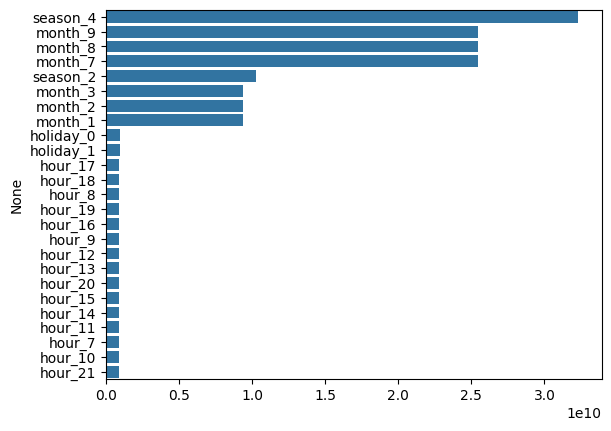

In [65]:
# coef = pd.Series(lr_reg.coef_, index=X_features_ohe.columns)
# coef_sort = coef.sort_values(ascending=False)[:25]
# sns.barplot(x=coef_sort.values, y=coef_sort.index)

<Axes: ylabel='None'>

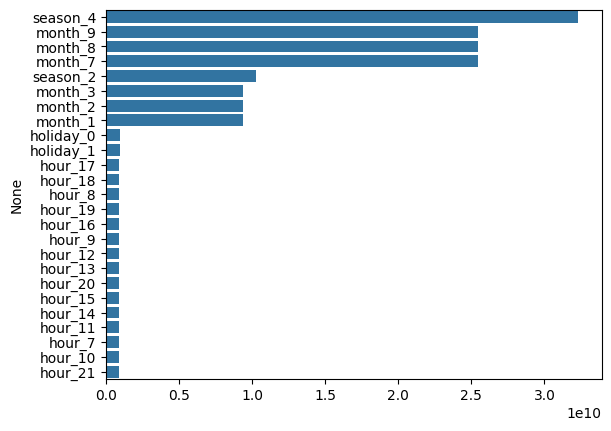

In [167]:
coef = pd.Series(lr_reg.coef_ , index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:25]
sns.barplot(x=coef_sort.values , y=coef_sort.index)

In [ ]:
1.4 회귀트리

In [ ]:
회귀 트리 모델을 이용하여 예측

In [20]:
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor

# # 회귀 트리 모델
# rf_reg = RandomForestRegressor(n_estimators=500)
# gb_reg = GradientBoostingRegressor(n_estimators=500)
# xgb_reg = XGBRegressor(n_estimators=500)
# lgbm_reg = LGBMRegressor(n_estimators=500)

# # 성능 평가
# models = [rf_reg, gb_reg, xgb_reg, lgbm_reg]

# for model in models:
#     get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

### RandomForestRegressor ###
MAE: 31.561, RMSE: 50.821, RMSLE: 0.355
### GradientBoostingRegressor ###
MAE: 34.352, RMSE: 55.787, RMSLE: 0.341
### XGBRegressor ###
MAE: 31.249, RMSE: 51.215, RMSLE: 0.341
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000782 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 330
[LightGBM] [Info] Number of data points in the train set: 7620, number of used features: 54
[LightGBM] [Info] Start training from score 4.582043
### LGBMRegressor ###
MAE: 28.777, RMSE: 46.473, RMSLE: 0.316


In [ ]:
앞서 선형 회귀 모델보다 예측 성능이 좋게 나타났지만 항상 그런 것은 아님을 알고 넘어가자.

In [185]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    # XGBoost의 경우 DataFrame이 입력 될 경우 버전에 따라 오류 발생 가능. ndarray로 변환.
    get_model_predict(model,X_train.values, X_test.values, y_train.values, y_test.values,is_expm1=True)

### RandomForestRegressor ###
RMSLE: 0.355, RMSE: 50.427, MAE: 31.157
--------------------------------------
   real_count  predicted_count   diff
0       244.0            251.0    7.0
1       239.0            317.0   78.0
2       229.0            270.0   41.0
3       467.0            568.0  101.0
4       335.0            368.0   33.0
5        40.0             54.0   14.0
6       329.0            338.0    9.0
7         2.0              3.0    1.0
8       141.0            225.0   84.0
9       391.0            488.0   97.0
### GradientBoostingRegressor ###
RMSLE: 0.330, RMSE: 53.363, MAE: 32.750
--------------------------------------
   real_count  predicted_count   diff
0       244.0            230.0   14.0
1       239.0            226.0   13.0
2       229.0            262.0   33.0
3       467.0            609.0  142.0
4       335.0            320.0   15.0
5        40.0             56.0   16.0
6       329.0            281.0   48.0
7         2.0              4.0    2.0
8       141.0     

In [184]:
# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict2(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
    #get_top_error_data(y_test,pred,n_tops=10)  ##
    print('--------------------------------------')
    #get_low_error_data(y_test,pred,n_tops=10)  ##
    get_compare_data2(y_test,pred,data_num=10)  ##
# end of function get_model_predict

In [176]:
rf_reg = RandomForestRegressor(n_estimators=500)

In [182]:
get_model_predict2(model,X_train.values, X_test.values, y_train.values, y_test.values,is_expm1=True)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000831 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 7620, number of used features: 72
[LightGBM] [Info] Start training from score 4.582043
### LGBMRegressor ###
RMSLE: 0.319, RMSE: 47.215, MAE: 29.029
--------------------------------------
   real_count  predicted_count   diff
0       244.0            253.0    9.0
1       239.0            328.0   89.0
2       229.0            290.0   61.0
3       467.0            671.0  204.0
4       335.0            326.0    9.0
5        40.0             57.0   17.0
6       329.0            301.0   28.0
7         2.0              3.0    1.0
8       141.0            151.0   10.0
9       391.0            484.0   93.0


In [183]:
def get_compare_data2(y_test, pred, data_num = 5):
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측 값을 서로 비교 할 수 있도록 생성.
    result_df = pd.DataFrame(y_test, columns=['real_count'])
    result_df['predicted_count']= np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력.
    print(result_df[:data_num])